In [1]:
import pandas as pd
import psycopg2
import sqlalchemy
import matplotlib as plt
import io

%matplotlib inline

In [3]:
from sqlalchemy import create_engine

POSTGRES_ADDRESS = 'localhost' ## INSERT YOUR DB ADDRESS IF IT'S NOT ON PANOPLY
POSTGRES_PORT = '5430'
POSTGRES_USERNAME = 'de' ## CHANGE THIS TO YOUR PANOPLY/POSTGRES USERNAME
POSTGRES_PASSWORD = 'takeitaway' ## CHANGE THIS TO YOUR PANOPLY/POSTGRES PASSWORD
POSTGRES_DBNAME = 'de' ## CHANGE THIS TO YOUR DATABASE NAME
# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME,password=POSTGRES_PASSWORD,ipaddress=POSTGRES_ADDRESS,port=POSTGRES_PORT,dbname=POSTGRES_DBNAME))
# Create the connection
cnx = create_engine(postgres_str)

In [8]:
def read_sql_inmem_uncompressed(query, conn):
    copy_sql = "COPY ({query}) TO STDOUT WITH CSV {head}".format(
       query=query, head="HEADER"
    )
    cur = conn.raw_connection().cursor()
    store = io.StringIO()
    cur.copy_expert(copy_sql, store)
    store.seek(0)
    df = pd.read_csv(store)
    return df

In [9]:
query = '''SELECT asin, rating from dbt_reviews.reviews_staging'''
ratings = read_sql_inmem_uncompressed(query, cnx)
ratings.head()

,asin,rating
0,0000000078,5.0
1,0000000116,4.0
2,0000000116,1.0
3,0000000868,4.0
4,0000013714,4.0


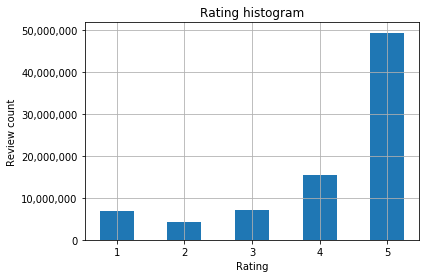

In [38]:
arr = ratings.rating.hist(bins=5, rwidth=0.5, range=[0.5,5.5], align='mid')
plt.pyplot.xlabel('Rating')
plt.pyplot.ylabel('Review count')
plt.pyplot.title('Rating histogram')
arr.get_yaxis().set_major_formatter(
    plt.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.pyplot.show()

In [3]:
query = '''select count(*) from dbt_reviews.metadata_alsobought ab
join dbt_reviews.metadata_alsoviewed av
on av.asin = ab.asin
where av.also_viewed = ab.also_bought'''
count = cnx.raw_connection().execute(query).scalar()
print("There are {} related products that are both 'also viewed' and 'also bought'".format(count))

NameError: name 'cnx' is not defined